In [1]:
import pandas as pd

train_query = pd.read_csv("./train/train.query.tsv", sep="\t", header=None)
train_reply = pd.read_csv("./train/train.reply.tsv", sep="\t", header=None)
test_query = pd.read_csv("./test/test.query.tsv", sep="\t", header=None)
test_reply = pd.read_csv("./test/test.reply.tsv", sep="\t", header=None)
train_query.columns = ["cid", "text_a"]
train_reply.columns = ["cid", "rid", "text_b", "label"]
train_df = pd.merge(train_query, train_reply, how="left", on="cid")
test_query.columns = ["cid", "text_a"]
test_reply.columns = ["cid", "rid", "text_b"]
test_df = pd.merge(test_query, test_reply, how="left", on="cid")
train_df.head(20)

,cid,text_a,rid,text_b,label
0,0,采荷一小是分校吧,0,杭州市采荷第一小学钱江苑校区，杭州市钱江新城实验学校。,1
1,0,采荷一小是分校吧,1,是的,0
2,0,采荷一小是分校吧,2,这是5楼,0
3,1,毛坯吗？,0,因为公积金贷款贷的少,0
4,1,毛坯吗？,1,是呢,0
5,1,毛坯吗？,2,这套一楼带院的，您看看,0
6,1,毛坯吗？,3,房本都是五年外的,0
7,1,毛坯吗？,4,好的??，您先看下,0
8,2,你们的佣金费大约是多少和契税是多少。,0,您是首套还是二套呢？,0
9,2,你们的佣金费大约是多少和契税是多少。,1,所有费用下来654万,1


In [5]:
# 先对数据的统计特征进行分析
print("训练集和测试集分别有：{}和{}".format(train_df.shape[0], test_df.shape[0]))
print("训练集的问题总共有：{}，测试集的问题总共有：{}".format(train_df.cid.nunique(), test_df.cid.nunique()))

# 文本内容的特征
import jieba
import string
import numpy as np
import jieba.posseg as psg

# char_count字符数量
train_df['q_char_len'] = train_df['text_a'].apply(lambda x: len(str(x)))
train_df['a_char_len'] = train_df['text_b'].apply(lambda x: len(str(x)))
# word_count单词数量
train_df['q_word_len'] = train_df['text_a'].apply(lambda x: len(list(jieba.cut(str(x)))))
train_df['a_word_len'] = train_df['text_b'].apply(lambda x: len(list(jieba.cut(str(x)))))
# unique_char_count只出现一次的字符数量
train_df['q_char_unique'] = train_df['text_a'].apply(lambda x: len(set(str(x))))
train_df['a_char_unique'] = train_df['text_b'].apply(lambda x: len(set(str(x))))
# unique_word_count只出现一次的单词数量
train_df['q_word_unique'] = train_df['text_a'].apply(lambda x: len(set(list(jieba.cut(str(x))))))
train_df['a_word_unique'] = train_df['text_b'].apply(lambda x: len(set(list(jieba.cut(str(x))))))
# punctuation_count标点数量
train_df["q_punctuation_count"] = train_df['text_a'].apply(lambda x: len([1 for w in str(x) if w in string.punctuation]))
train_df["a_punctuation_count"] = train_df['text_b'].apply(lambda x: len([1 for w in str(x) if w in string.punctuation]))
# mean_word_length平均单词长度
train_df["q_mean_word_length"] = train_df['text_a'].apply(lambda x: np.array([len(w) for w in list(jieba.cut(str(x)))]).mean())
train_df["a_mean_word_length"] = train_df['text_b'].apply(lambda x: np.array([len(w) for w in list(jieba.cut(str(x)))]).mean())
# max_word_length最大单词长度
train_df["q_max_word_length"] = train_df['text_a'].apply(lambda x: max(([len(w) for w in list(jieba.cut(str(x)))])))
train_df["a_max_word_length"] = train_df['text_b'].apply(lambda x: max(([len(w) for w in list(jieba.cut(str(x)))])))
# category_of_punctuation标点符号的种类
train_df["q_category_of_punctuation"] = train_df['text_a'].apply(lambda x: len(set([w for w in str(x) if w in string.punctuation])))
train_df["a_category_of_punctuation"] = train_df['text_b'].apply(lambda x: len(set([w for w in str(x) if w in string.punctuation])))
# num_of_noun名词数量
train_df["q_num_of_noun"] = train_df['text_a'].apply(lambda x: sum([1 for pair in psg.cut(str(x)) if 'n' in pair.flag]))
train_df["a_num_of_noun"] = train_df['text_b'].apply(lambda x: sum([1 for pair in psg.cut(str(x)) if 'n' in pair.flag]))
# num_of_verb动词数量
train_df["q_num_of_verb"] = train_df['text_a'].apply(lambda x: sum([1 for pair in psg.cut(str(x)) if 'v' in pair.flag]))
train_df["a_num_of_verb"] = train_df['text_b'].apply(lambda x: sum([1 for pair in psg.cut(str(x)) if 'v' in pair.flag]))
# sum_of_tf_idf


训练集和测试集分别有：21585和53757
训练集的问题总共有：6000，测试集的问题总共有：14000


In [3]:
# char_count字符数量
test_df['q_char_len'] = test_df['text_a'].apply(lambda x: len(str(x)))
test_df['a_char_len'] = test_df['text_b'].apply(lambda x: len(str(x)))
# word_count单词数量
test_df['q_word_len'] = test_df['text_a'].apply(lambda x: len(list(jieba.cut(str(x)))))
test_df['a_word_len'] = test_df['text_b'].apply(lambda x: len(list(jieba.cut(str(x)))))
# unique_char_count只出现一次的字符数量
test_df['q_char_unique'] = test_df['text_a'].apply(lambda x: len(set(str(x))))
test_df['a_char_unique'] = test_df['text_b'].apply(lambda x: len(set(str(x))))
# unique_word_count只出现一次的单词数量
test_df['q_word_unique'] = test_df['text_a'].apply(lambda x: len(set(list(jieba.cut(str(x))))))
test_df['a_word_unique'] = test_df['text_b'].apply(lambda x: len(set(list(jieba.cut(str(x))))))
# punctuation_count标点数量
test_df["q_punctuation_count"] = test_df['text_a'].apply(lambda x: len([1 for w in str(x) if w in string.punctuation]))
test_df["a_punctuation_count"] = test_df['text_b'].apply(lambda x: len([1 for w in str(x) if w in string.punctuation]))
# mean_word_length平均单词长度
test_df["q_mean_word_length"] = test_df['text_a'].apply(lambda x: np.array([len(w) for w in list(jieba.cut(str(x)))]).mean())
test_df["a_mean_word_length"] = test_df['text_b'].apply(lambda x: np.array([len(w) for w in list(jieba.cut(str(x)))]).mean())
# max_word_length最大单词长度
test_df["q_max_word_length"] = test_df['text_a'].apply(lambda x: max(([len(w) for w in list(jieba.cut(str(x)))])))
test_df["a_max_word_length"] = test_df['text_b'].apply(lambda x: max(([len(w) for w in list(jieba.cut(str(x)))])))
# category_of_punctuation标点符号的种类
test_df["q_category_of_punctuation"] = test_df['text_a'].apply(lambda x: len(set([w for w in str(x) if w in string.punctuation])))
test_df["a_category_of_punctuation"] = test_df['text_b'].apply(lambda x: len(set([w for w in str(x) if w in string.punctuation])))
# num_of_noun名词数量
test_df["q_num_of_noun"] = test_df['text_a'].apply(lambda x: sum([1 for pair in psg.cut(str(x)) if 'n' in pair.flag]))
test_df["a_num_of_noun"] = test_df['text_b'].apply(lambda x: sum([1 for pair in psg.cut(str(x)) if 'n' in pair.flag]))
# num_of_verb动词数量
test_df["q_num_of_verb"] = test_df['text_a'].apply(lambda x: sum([1 for pair in psg.cut(str(x)) if 'v' in pair.flag]))
test_df["a_num_of_verb"] = test_df['text_b'].apply(lambda x: sum([1 for pair in psg.cut(str(x)) if 'v' in pair.flag]))
# sum_of_tf_idf


In [5]:
train_df.head(5)

,cid,text_a,rid,text_b,label,q_char_len,a_char_len,q_word_len,a_word_len,q_char_unique,...,q_mean_word_length,a_mean_word_length,q_max_word_length,a_max_word_length,q_category_of_punctuation,a_category_of_punctuation,q_num_of_noun,a_num_of_noun,q_num_of_verb,a_num_of_verb
0,0,采荷一小是分校吧,0,杭州市采荷第一小学钱江苑校区，杭州市钱江新城实验学校。,1,8,27,5,12,8,...,1.600000,2.250000,2,4,0,0,2,9,1,0
1,0,采荷一小是分校吧,1,是的,0,8,2,5,2,8,...,1.600000,1.000000,2,1,0,0,2,0,1,1
2,0,采荷一小是分校吧,2,这是5楼,0,8,4,5,3,8,...,1.600000,1.333333,2,2,0,0,2,1,1,1
3,1,毛坯吗？,0,因为公积金贷款贷的少,0,4,10,3,6,4,...,1.333333,1.666667,2,3,0,0,1,3,0,1
4,1,毛坯吗？,1,是呢,0,4,2,3,2,4,...,1.333333,1.000000,2,1,0,0,1,0,0,1


In [7]:
train_df["qa_len"] = train_df["q_char_len"] + train_df["a_char_len"]

正样本所占比例为：24.96%,负样本所占比例为：75.04%，正负样本比例为：1.0:3.006868386857249


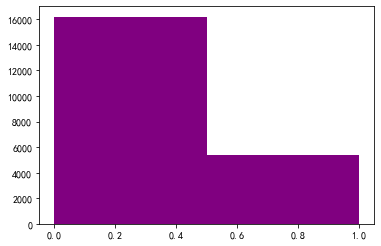

In [7]:
# 统计标签分布，看是否平衡
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签
plt.rcParams['axes.unicode_minus']=False

percentage_positive = train_df.label.values.mean()

# 标签不太平衡
plt.hist(train_df.label.values, bins=2, color='purple')
print("正样本所占比例为：{:.2%},负样本所占比例为：{:.2%}，正负样本比例为：{}:{}".format(percentage_positive, 1-percentage_positive, 1.0, (1-percentage_positive)/percentage_positive))
plt.show()

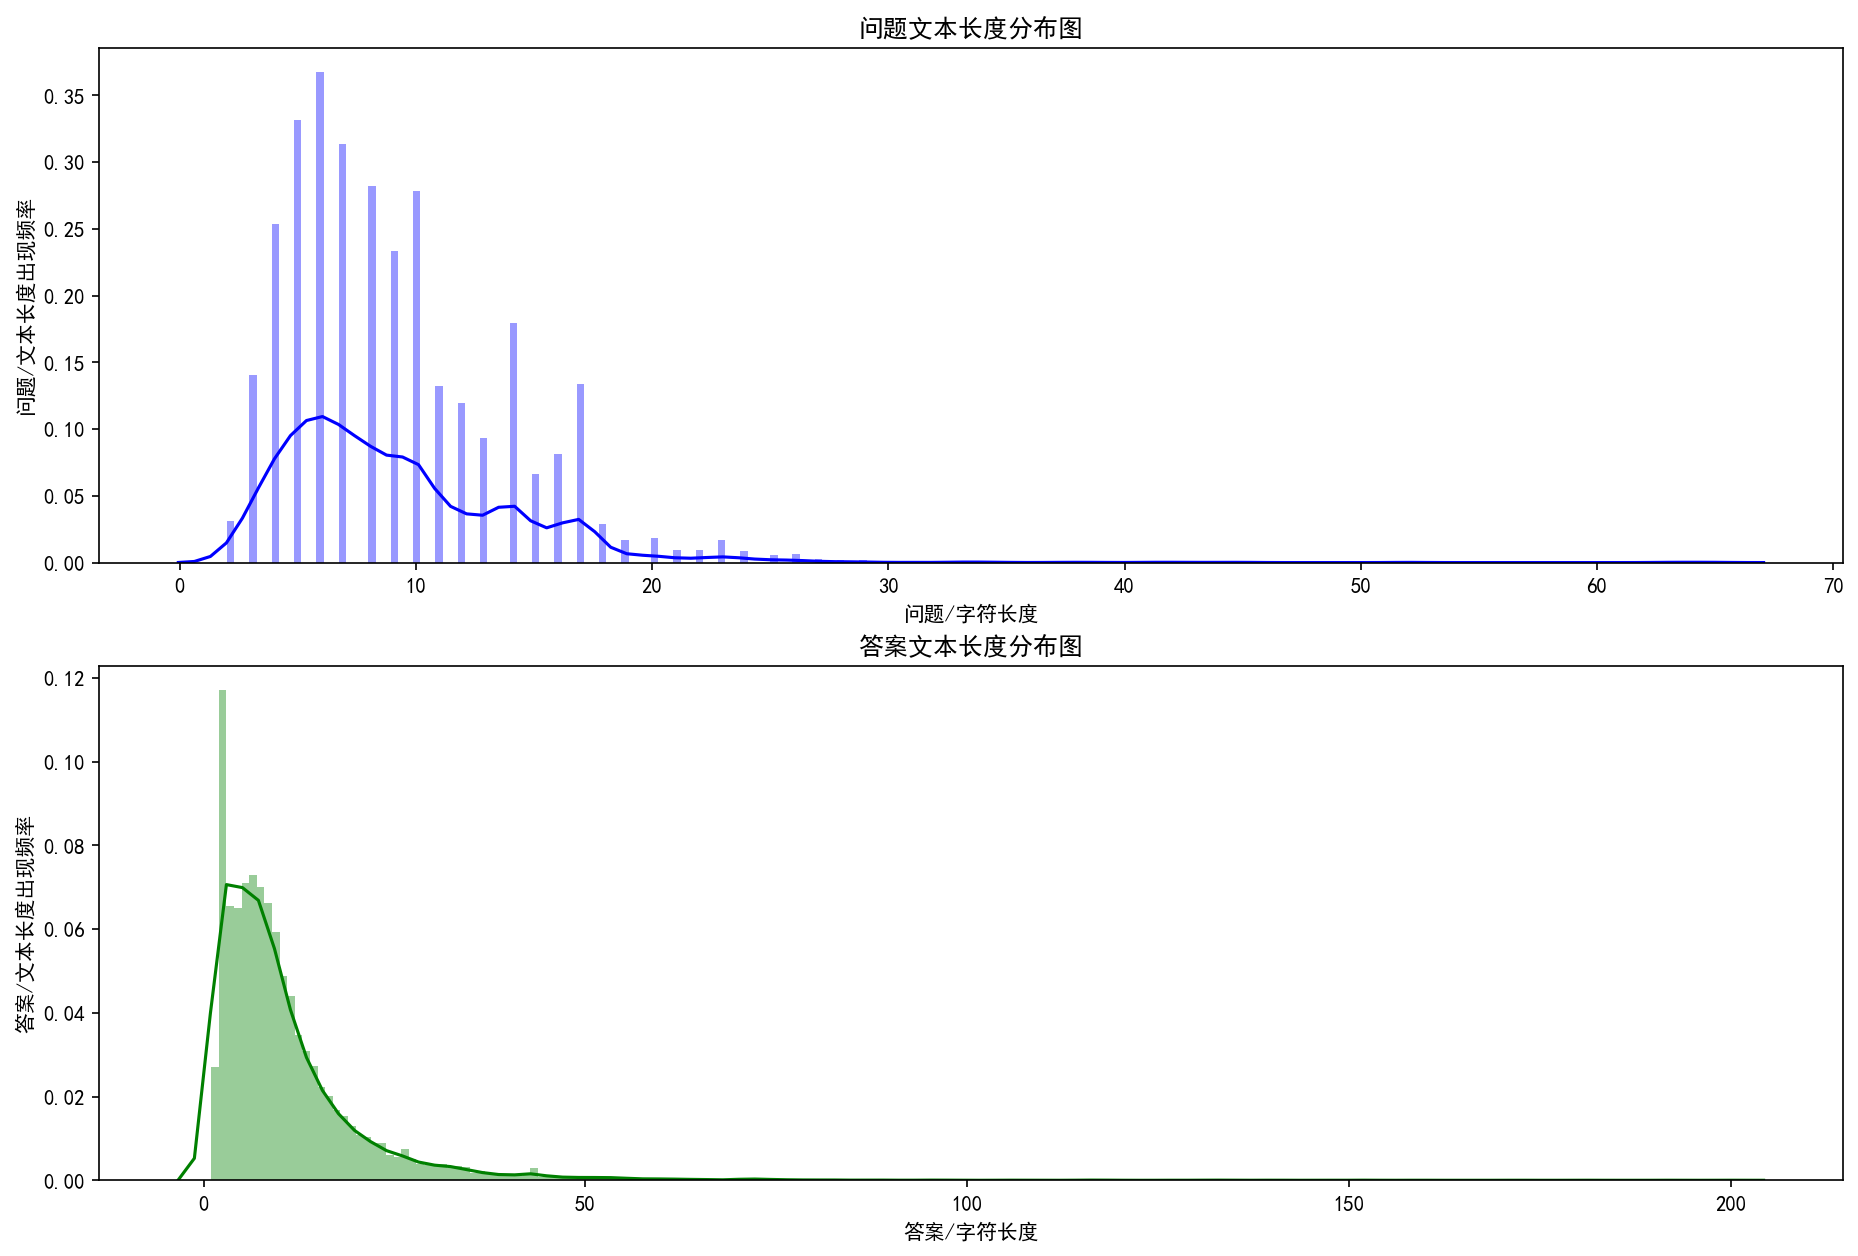

In [8]:
# 统计文本长度的分布

plt.figure(figsize=(15,10), dpi=150)
plt.subplot(2,1,1)
sns.distplot(train_df.q_char_len, bins=200, color='blue')
plt.xlabel("问题/字符长度")
plt.ylabel("问题/文本长度出现频率")
plt.title("问题文本长度分布图")
plt.subplot(2,1,2)
sns.distplot(train_df.a_char_len, bins=200, color='green')
plt.xlabel("答案/字符长度")
plt.ylabel("答案/文本长度出现频率")
plt.title("答案文本长度分布图")
plt.show()

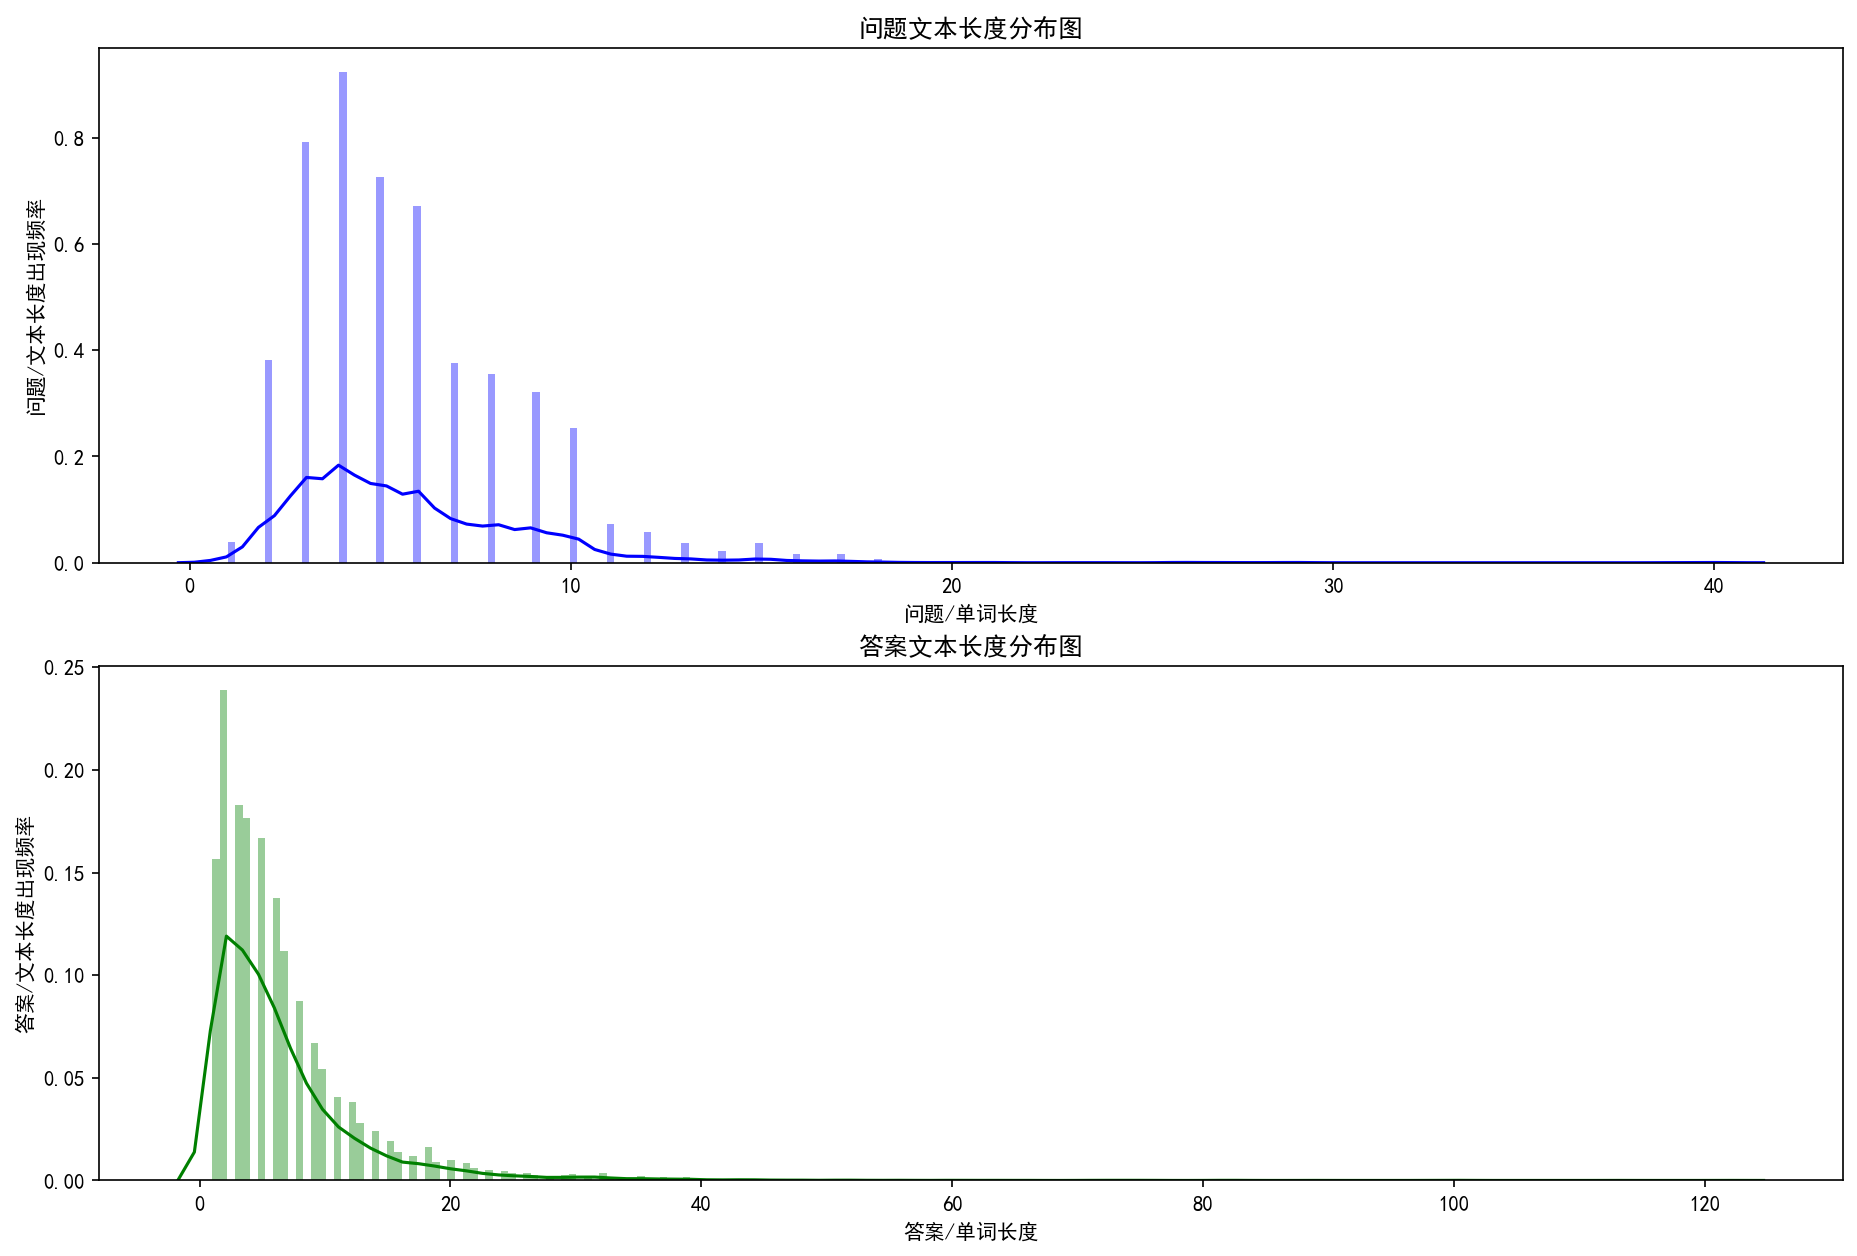

In [7]:
# 统计单词数量的分布

plt.figure(figsize=(15,10), dpi=150)
plt.subplot(2,1,1)
sns.distplot(train_df.q_word_len, bins=200, color='blue')
plt.xlabel("问题/单词长度")
plt.ylabel("问题/文本长度出现频率")
plt.title("问题文本长度分布图")
plt.subplot(2,1,2)
sns.distplot(train_df.a_word_len, bins=200, color='green')
plt.xlabel("答案/单词长度")
plt.ylabel("答案/文本长度出现频率")
plt.title("答案文本长度分布图")
plt.show()

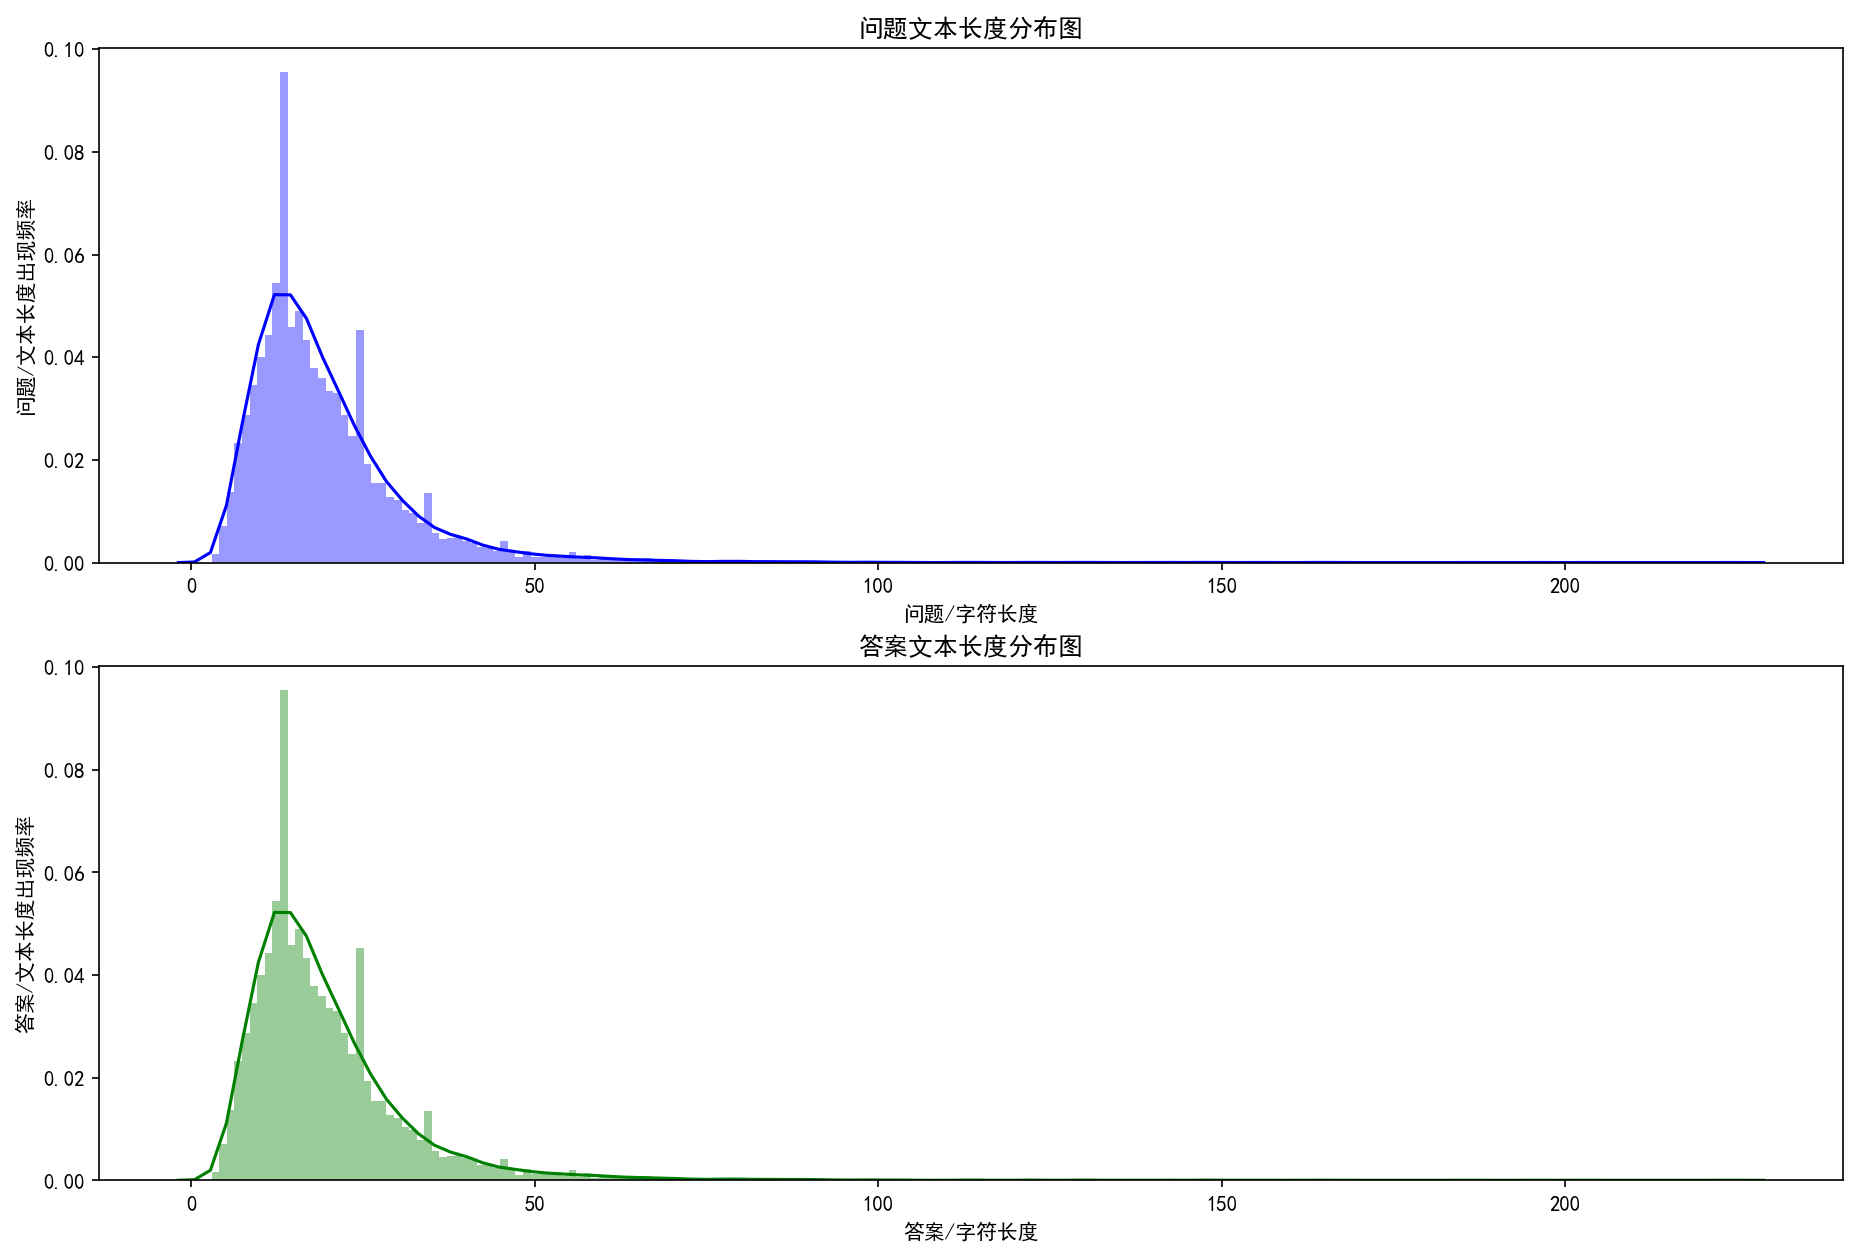

In [8]:
plt.figure(figsize=(15,10), dpi=150)
plt.subplot(2,1,1)
sns.distplot(train_df.qa_len, bins=200, color='blue')
plt.xlabel("问题/字符长度")
plt.ylabel("问题/文本长度出现频率")
plt.title("问题文本长度分布图")
plt.subplot(2,1,2)
sns.distplot(train_df.qa_len, bins=200, color='green')
plt.xlabel("答案/字符长度")
plt.ylabel("答案/文本长度出现频率")
plt.title("答案文本长度分布图")
plt.show()

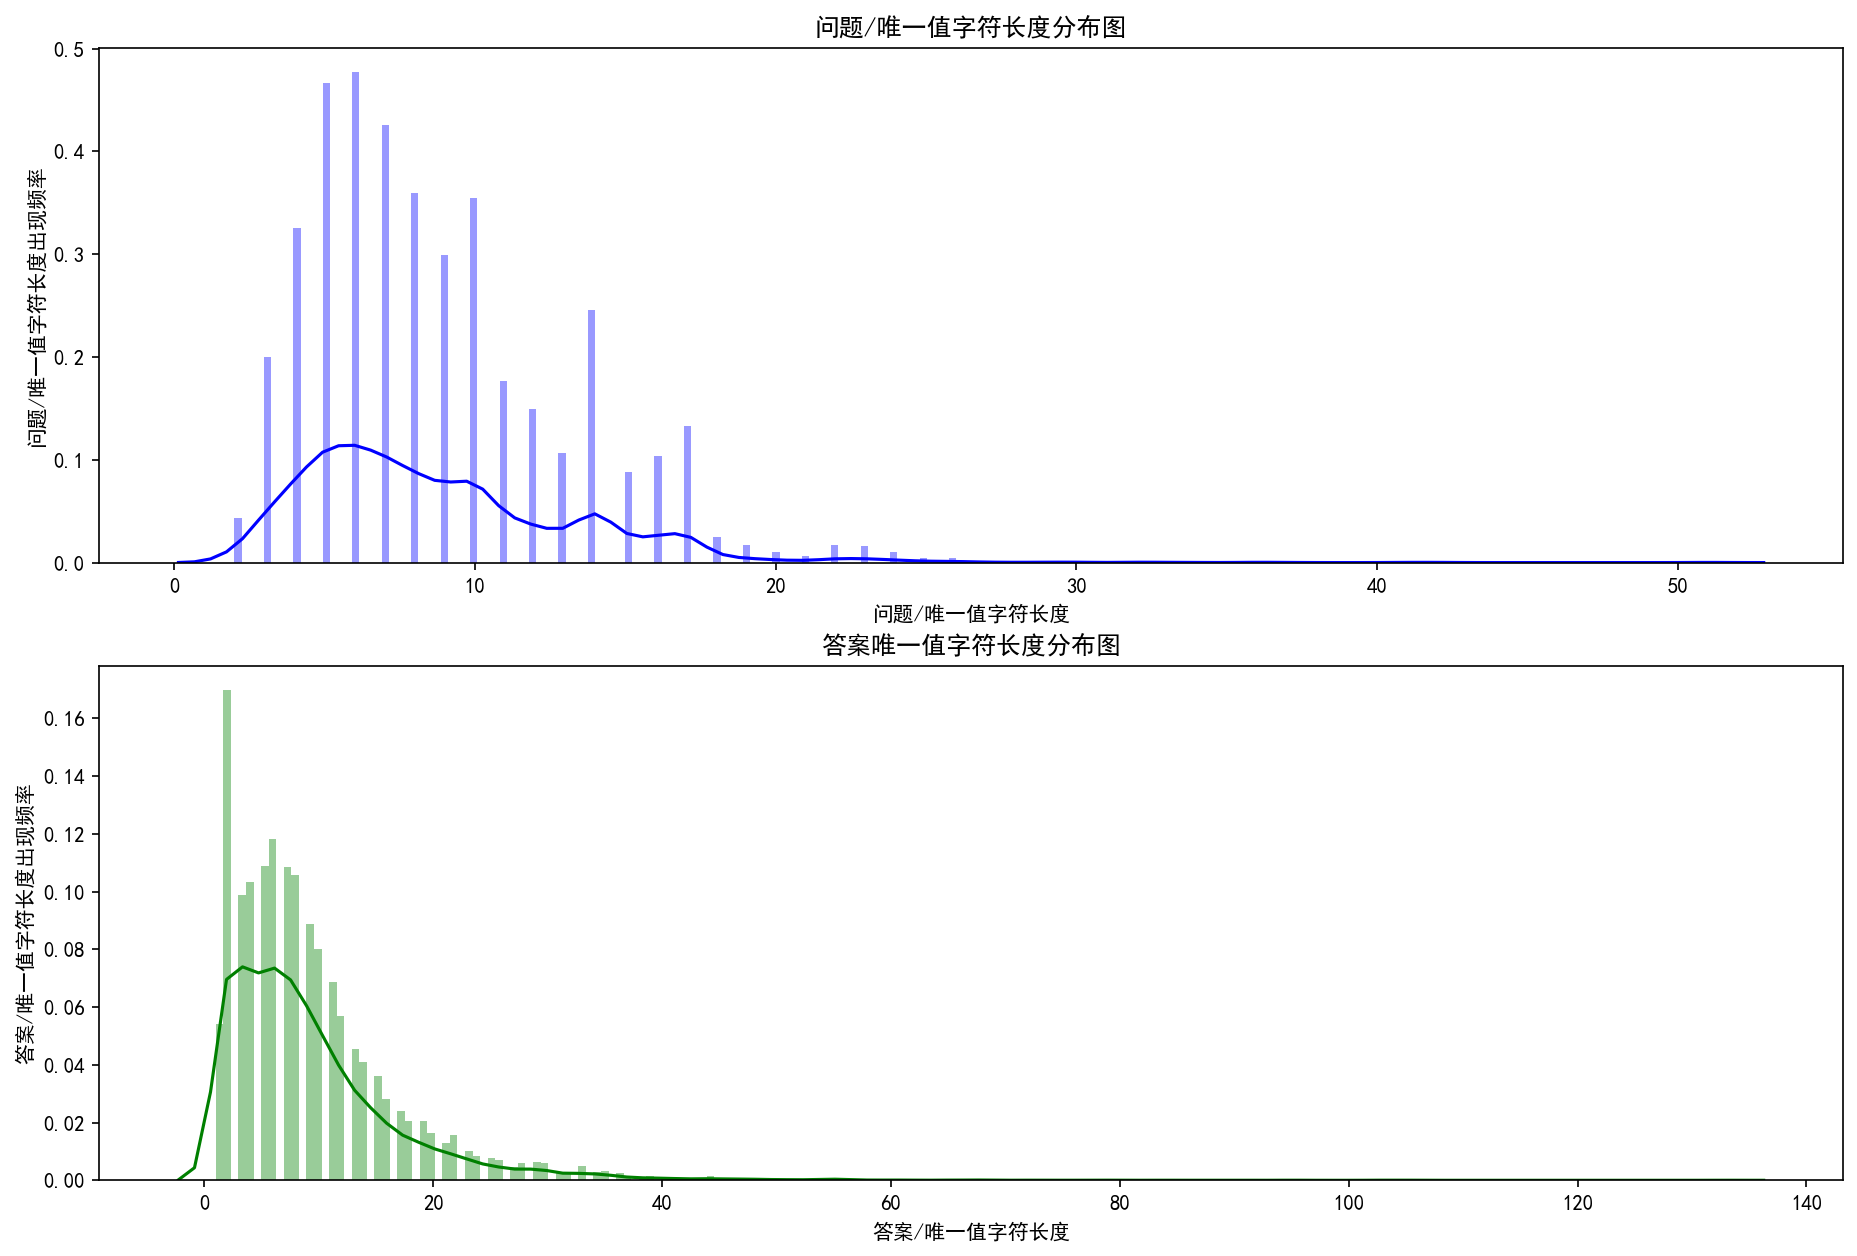

In [25]:
# 单个字符唯一值的数量

plt.figure(figsize=(15,10), dpi=150)
plt.subplot(2,1,1)
sns.distplot(train_df.q_char_unique, bins=200, color='blue')
plt.xlabel("问题/唯一值字符长度")
plt.ylabel("问题/唯一值字符长度出现频率")
plt.title("问题/唯一值字符长度分布图")
plt.subplot(2,1,2)
sns.distplot(train_df.a_char_unique, bins=200, color='green')
plt.xlabel("答案/唯一值字符长度")
plt.ylabel("答案/唯一值字符长度出现频率")
plt.title("答案唯一值字符长度分布图")
plt.show()

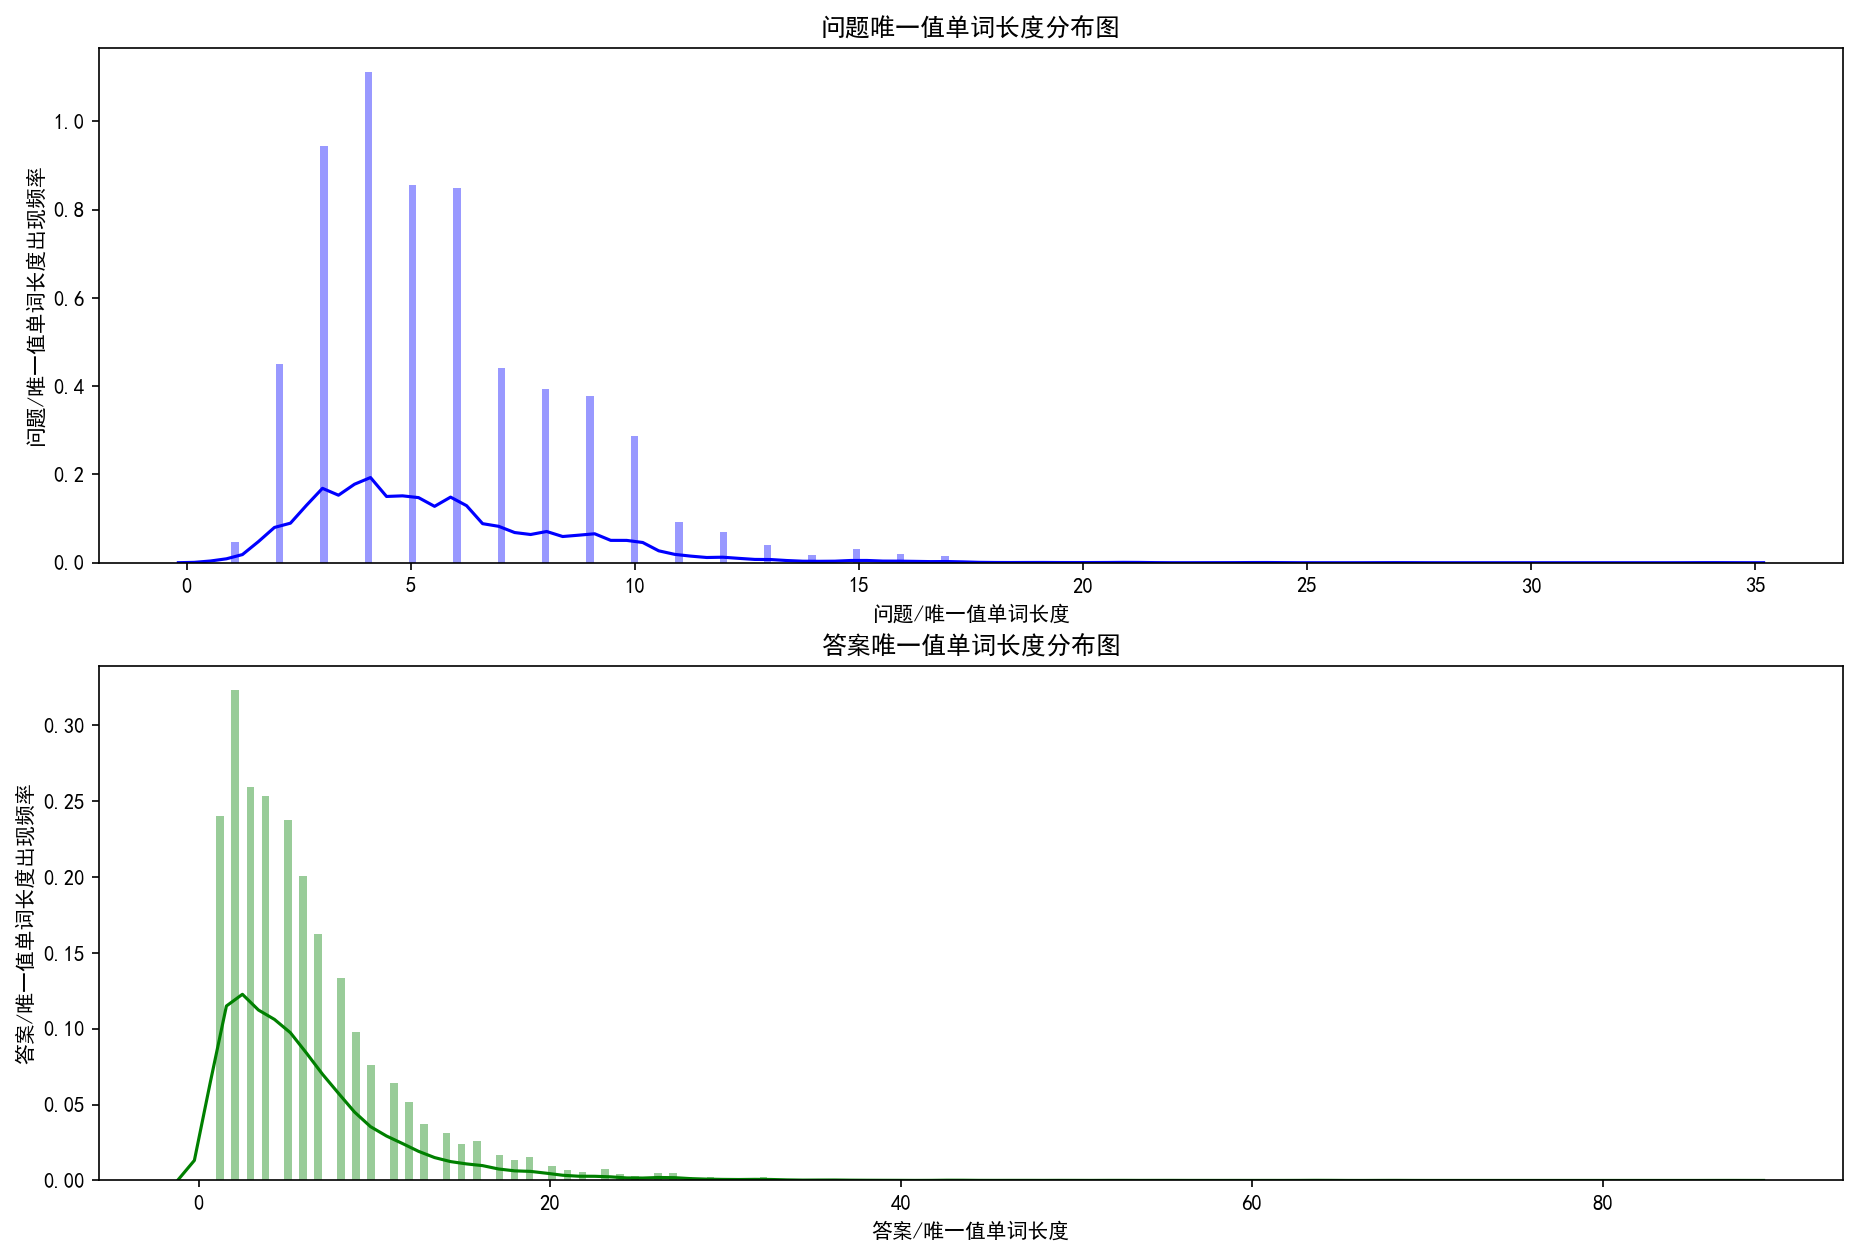

In [26]:
# 唯一值词语的数量

plt.figure(figsize=(15,10), dpi=150)
plt.subplot(2,1,1)
sns.distplot(train_df.q_word_unique, bins=200, color='blue')
plt.xlabel("问题/唯一值单词长度")
plt.ylabel("问题/唯一值单词长度出现频率")
plt.title("问题唯一值单词长度分布图")
plt.subplot(2,1,2)
sns.distplot(train_df.a_word_unique, bins=200, color='green')
plt.xlabel("答案/唯一值单词长度")
plt.ylabel("答案/唯一值单词长度出现频率")
plt.title("答案唯一值单词长度分布图")
plt.show()

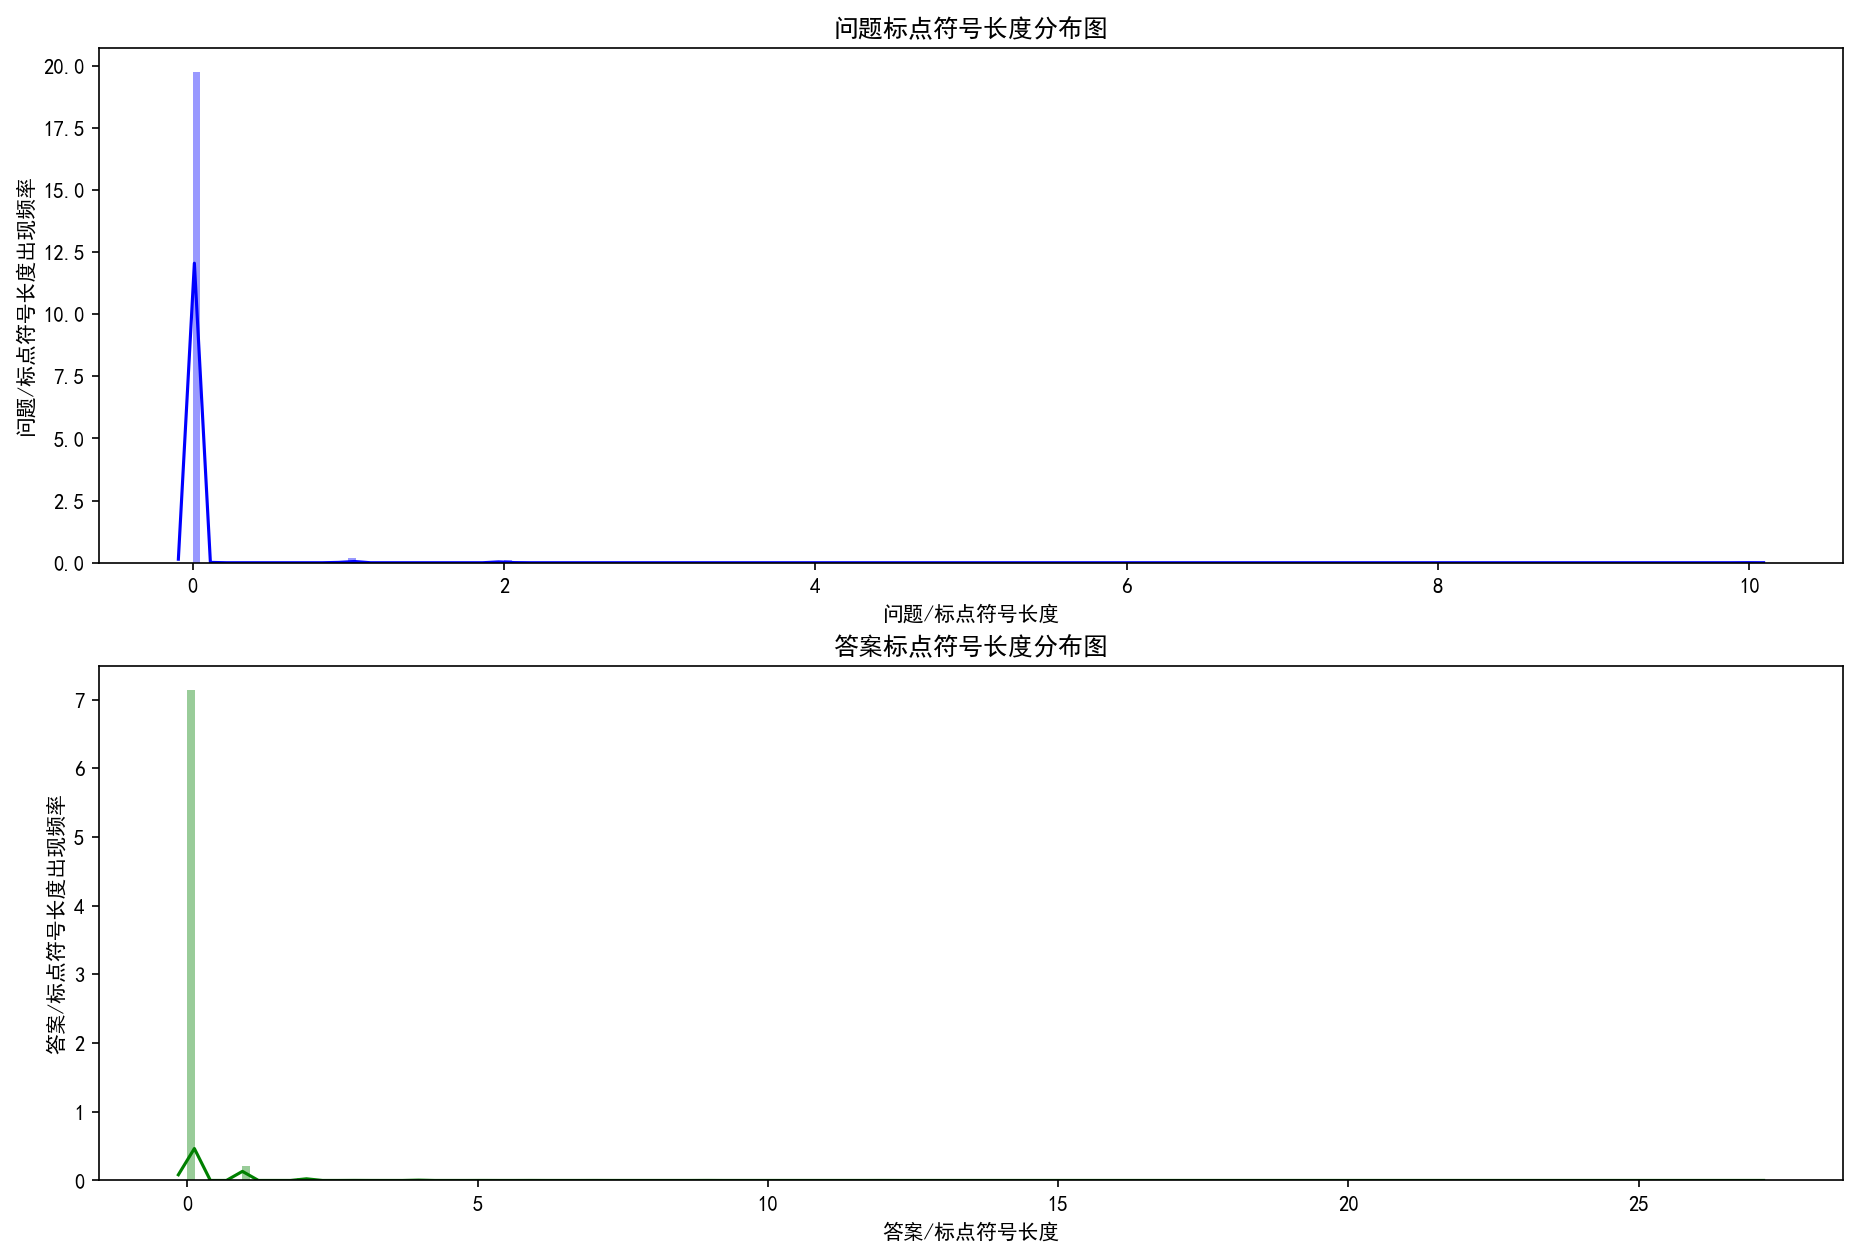

In [27]:
# 标点符号数量

plt.figure(figsize=(15,10), dpi=150)
plt.subplot(2,1,1)
sns.distplot(train_df.q_punctuation_count, bins=200, color='blue')
plt.xlabel("问题/标点符号长度")
plt.ylabel("问题/标点符号长度出现频率")
plt.title("问题标点符号长度分布图")
plt.subplot(2,1,2)
sns.distplot(train_df.a_punctuation_count, bins=200, color='green')
plt.xlabel("答案/标点符号长度")
plt.ylabel("答案/标点符号长度出现频率")
plt.title("答案标点符号长度分布图")
plt.show()

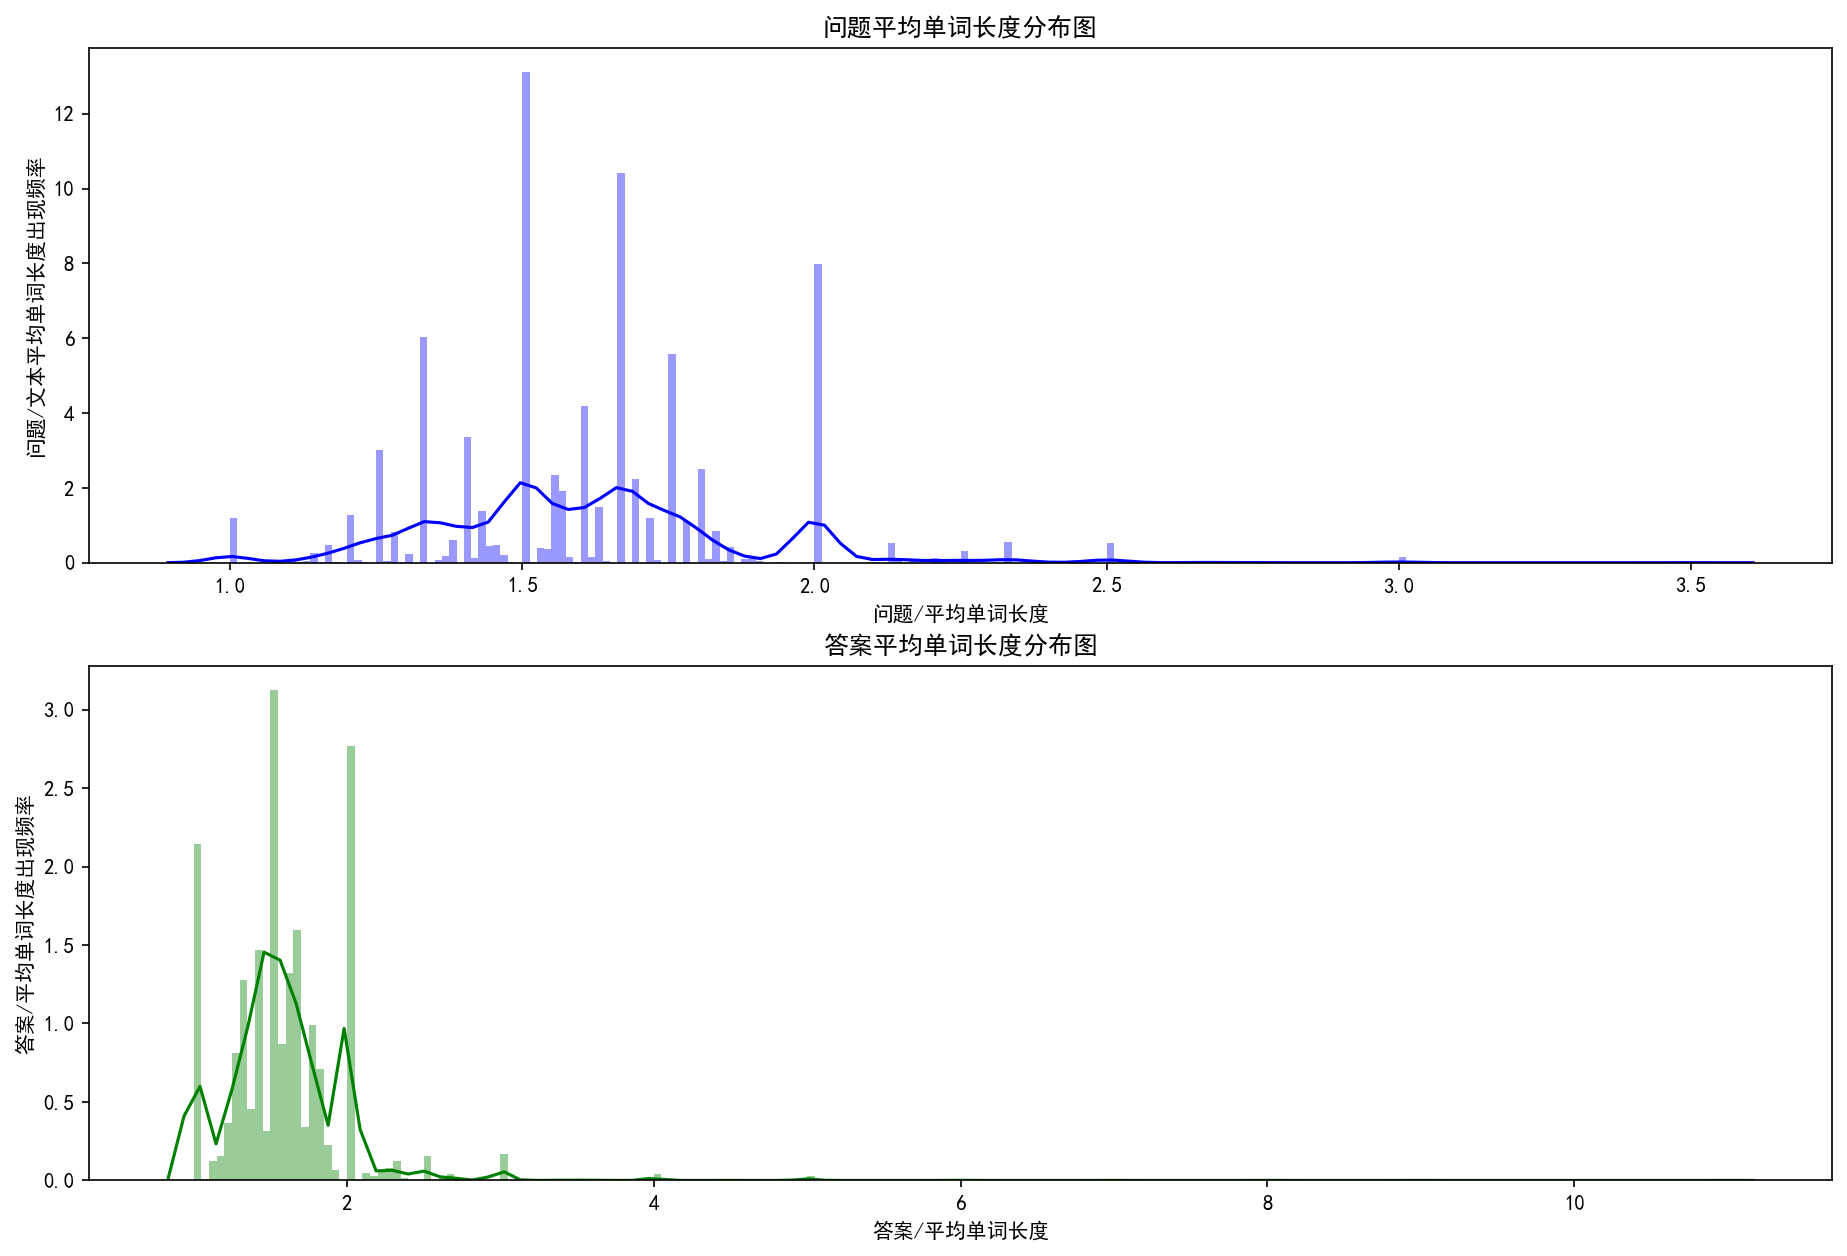

In [28]:
# 平均单词长度

plt.figure(figsize=(15,10), dpi=150)
plt.subplot(2,1,1)
sns.distplot(train_df.q_mean_word_length, bins=200, color='blue')
plt.xlabel("问题/平均单词长度")
plt.ylabel("问题/文本平均单词长度出现频率")
plt.title("问题平均单词长度分布图")
plt.subplot(2,1,2)
sns.distplot(train_df.a_mean_word_length, bins=200, color='green')
plt.xlabel("答案/平均单词长度")
plt.ylabel("答案/平均单词长度出现频率")
plt.title("答案平均单词长度分布图")
plt.show()

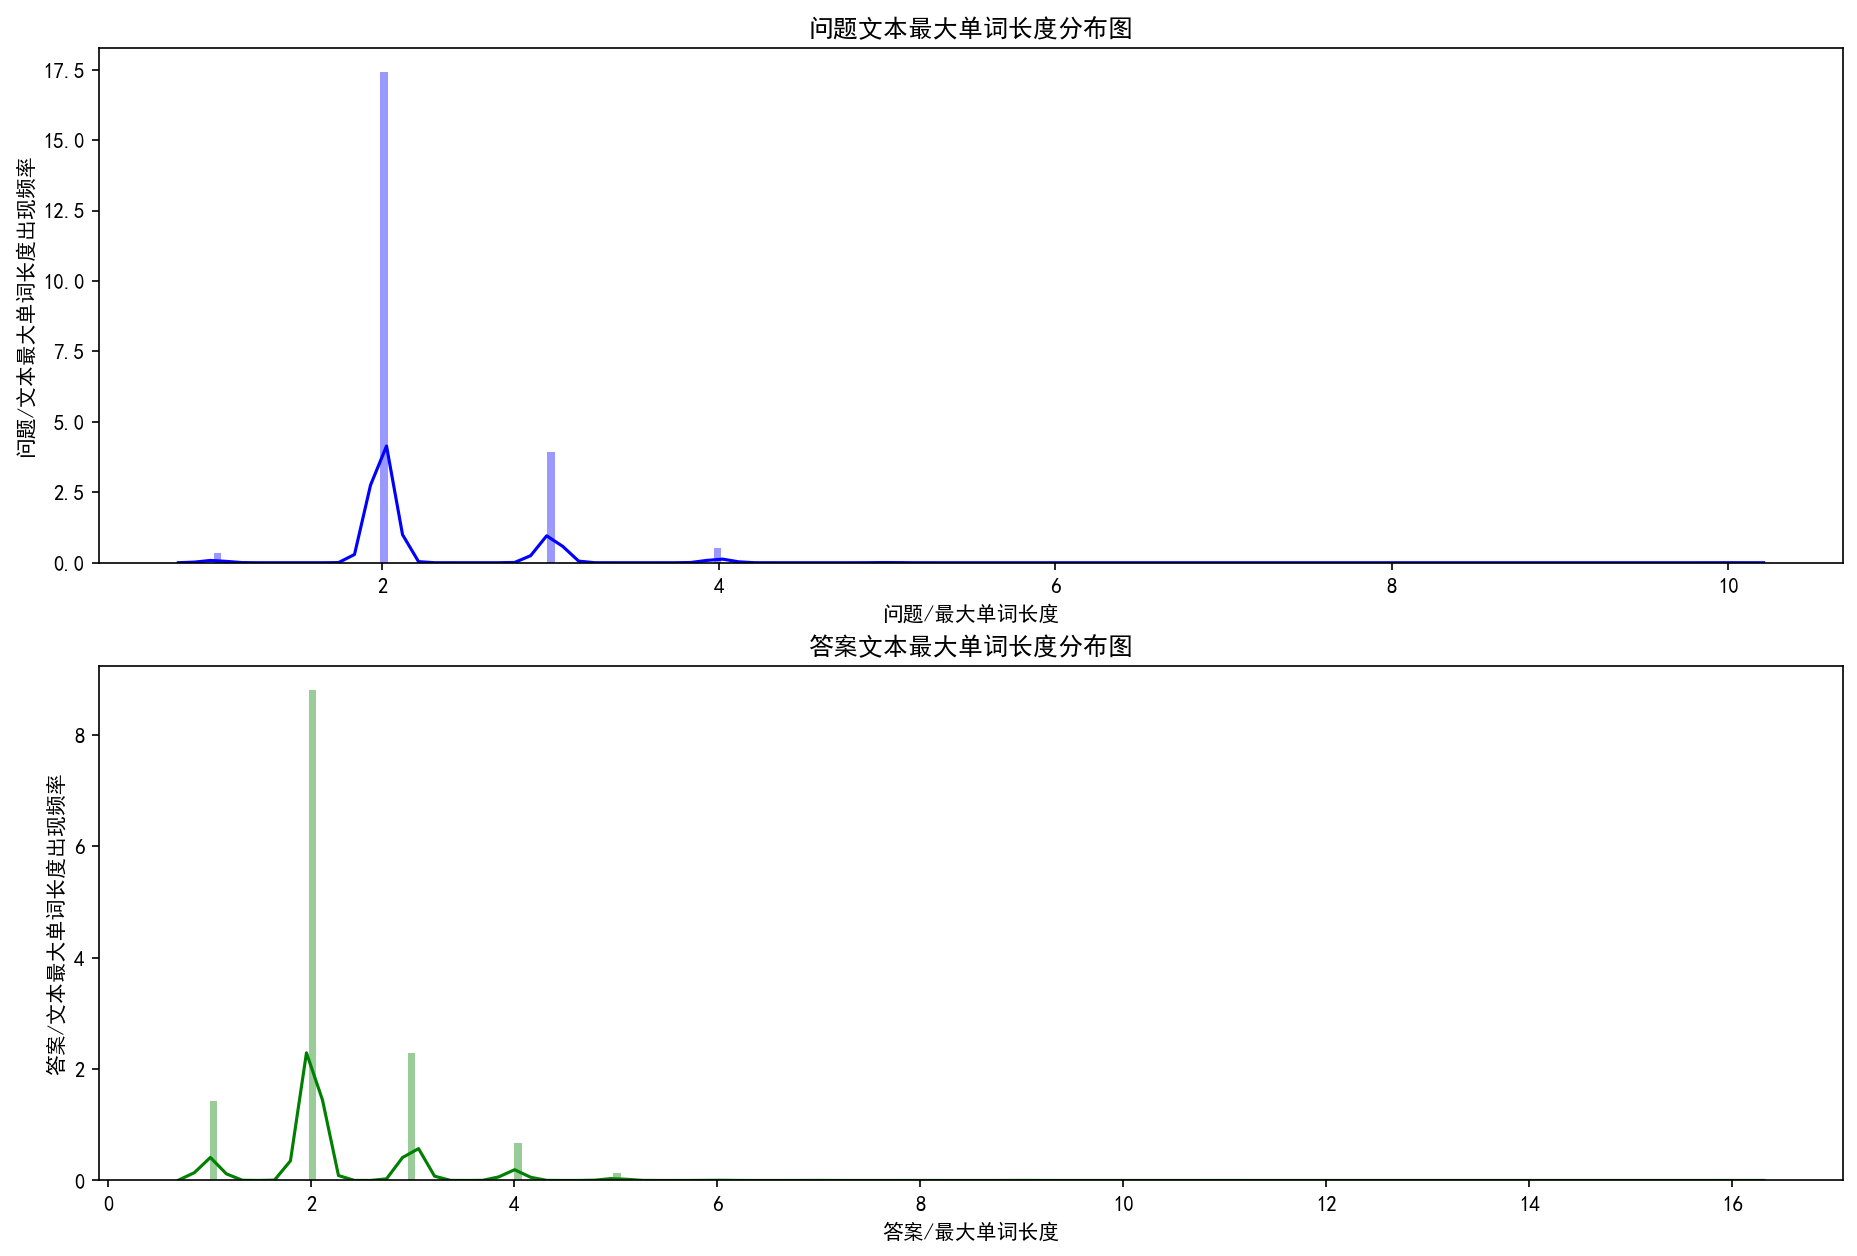

In [29]:
# 最大单词长度

plt.figure(figsize=(15,10), dpi=150)
plt.subplot(2,1,1)
sns.distplot(train_df.q_max_word_length, bins=200, color='blue')
plt.xlabel("问题/最大单词长度")
plt.ylabel("问题/文本最大单词长度出现频率")
plt.title("问题文本最大单词长度分布图")
plt.subplot(2,1,2)
sns.distplot(train_df.a_max_word_length, bins=200, color='green')
plt.xlabel("答案/最大单词长度")
plt.ylabel("答案/文本最大单词长度出现频率")
plt.title("答案文本最大单词长度分布图")
plt.show()

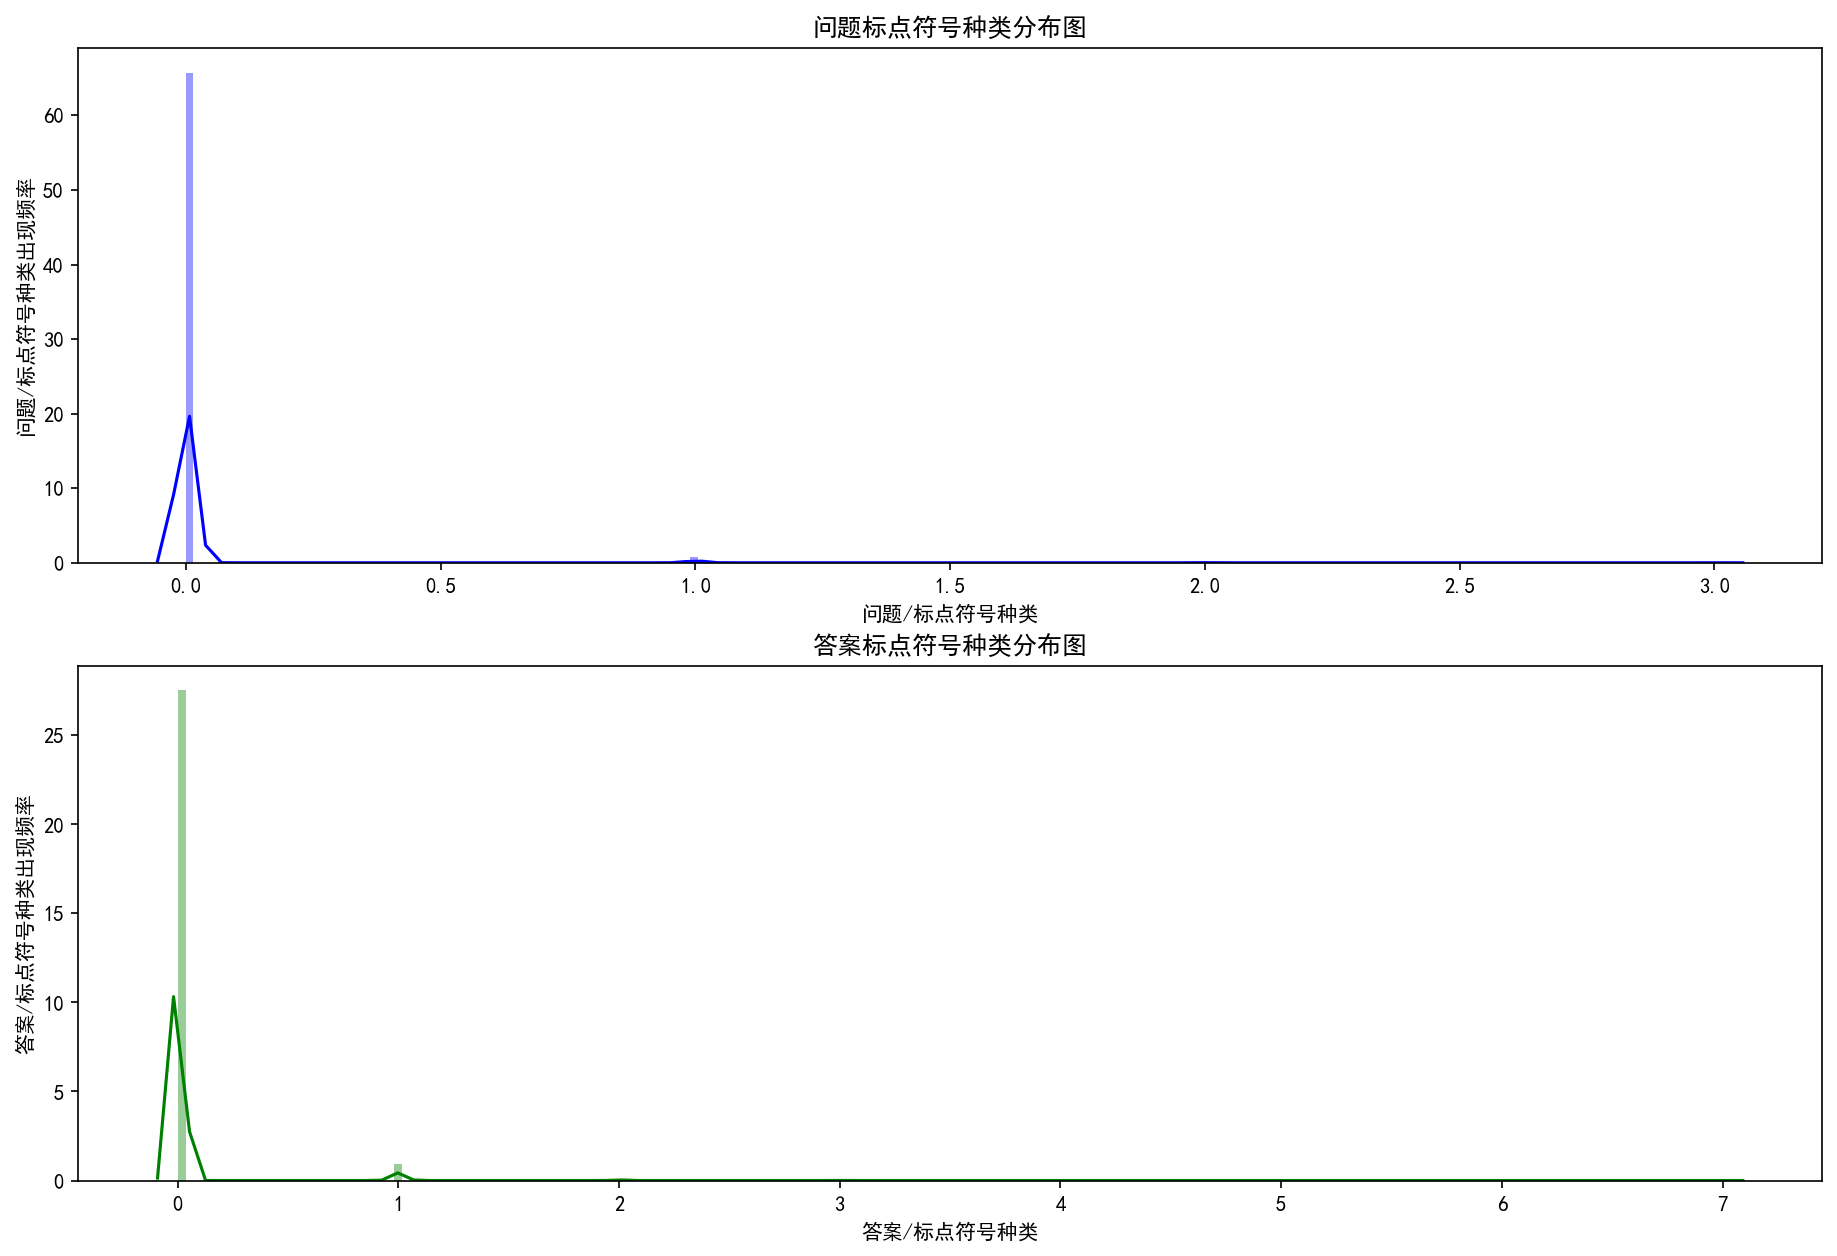

In [30]:
# 标点符号的种类

plt.figure(figsize=(15,10), dpi=150)
plt.subplot(2,1,1)
sns.distplot(train_df.q_category_of_punctuation, bins=200, color='blue')
plt.xlabel("问题/标点符号种类")
plt.ylabel("问题/标点符号种类出现频率")
plt.title("问题标点符号种类分布图")
plt.subplot(2,1,2)
sns.distplot(train_df.a_category_of_punctuation, bins=200, color='green')
plt.xlabel("答案/标点符号种类")
plt.ylabel("答案/标点符号种类出现频率")
plt.title("答案标点符号种类分布图")
plt.show()

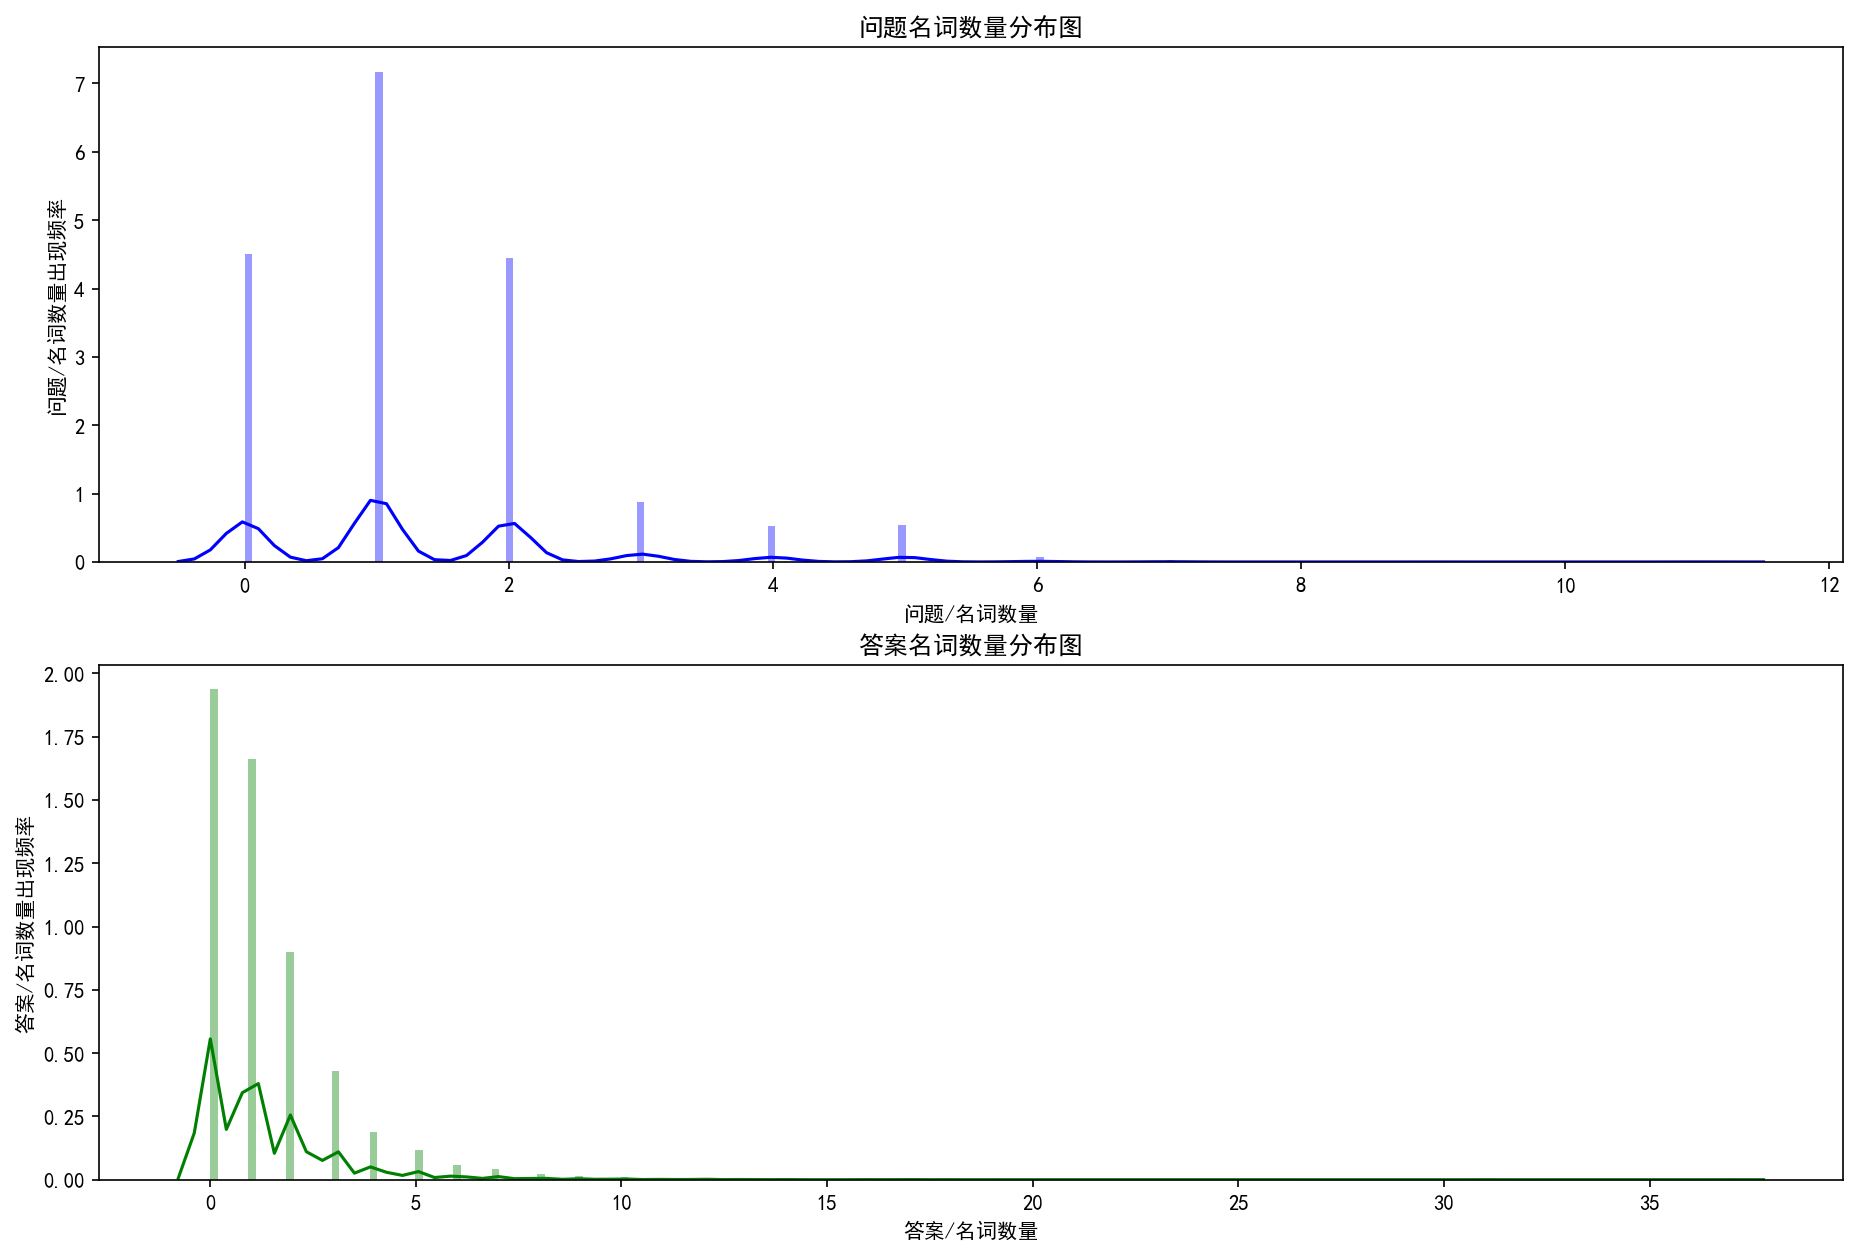

In [31]:
# 名词数量的分布

plt.figure(figsize=(15,10), dpi=150)
plt.subplot(2,1,1)
sns.distplot(train_df.q_num_of_noun, bins=200, color='blue')
plt.xlabel("问题/名词数量")
plt.ylabel("问题/名词数量出现频率")
plt.title("问题名词数量分布图")
plt.subplot(2,1,2)
sns.distplot(train_df.a_num_of_noun, bins=200, color='green')
plt.xlabel("答案/名词数量")
plt.ylabel("答案/名词数量出现频率")
plt.title("答案名词数量分布图")
plt.show()

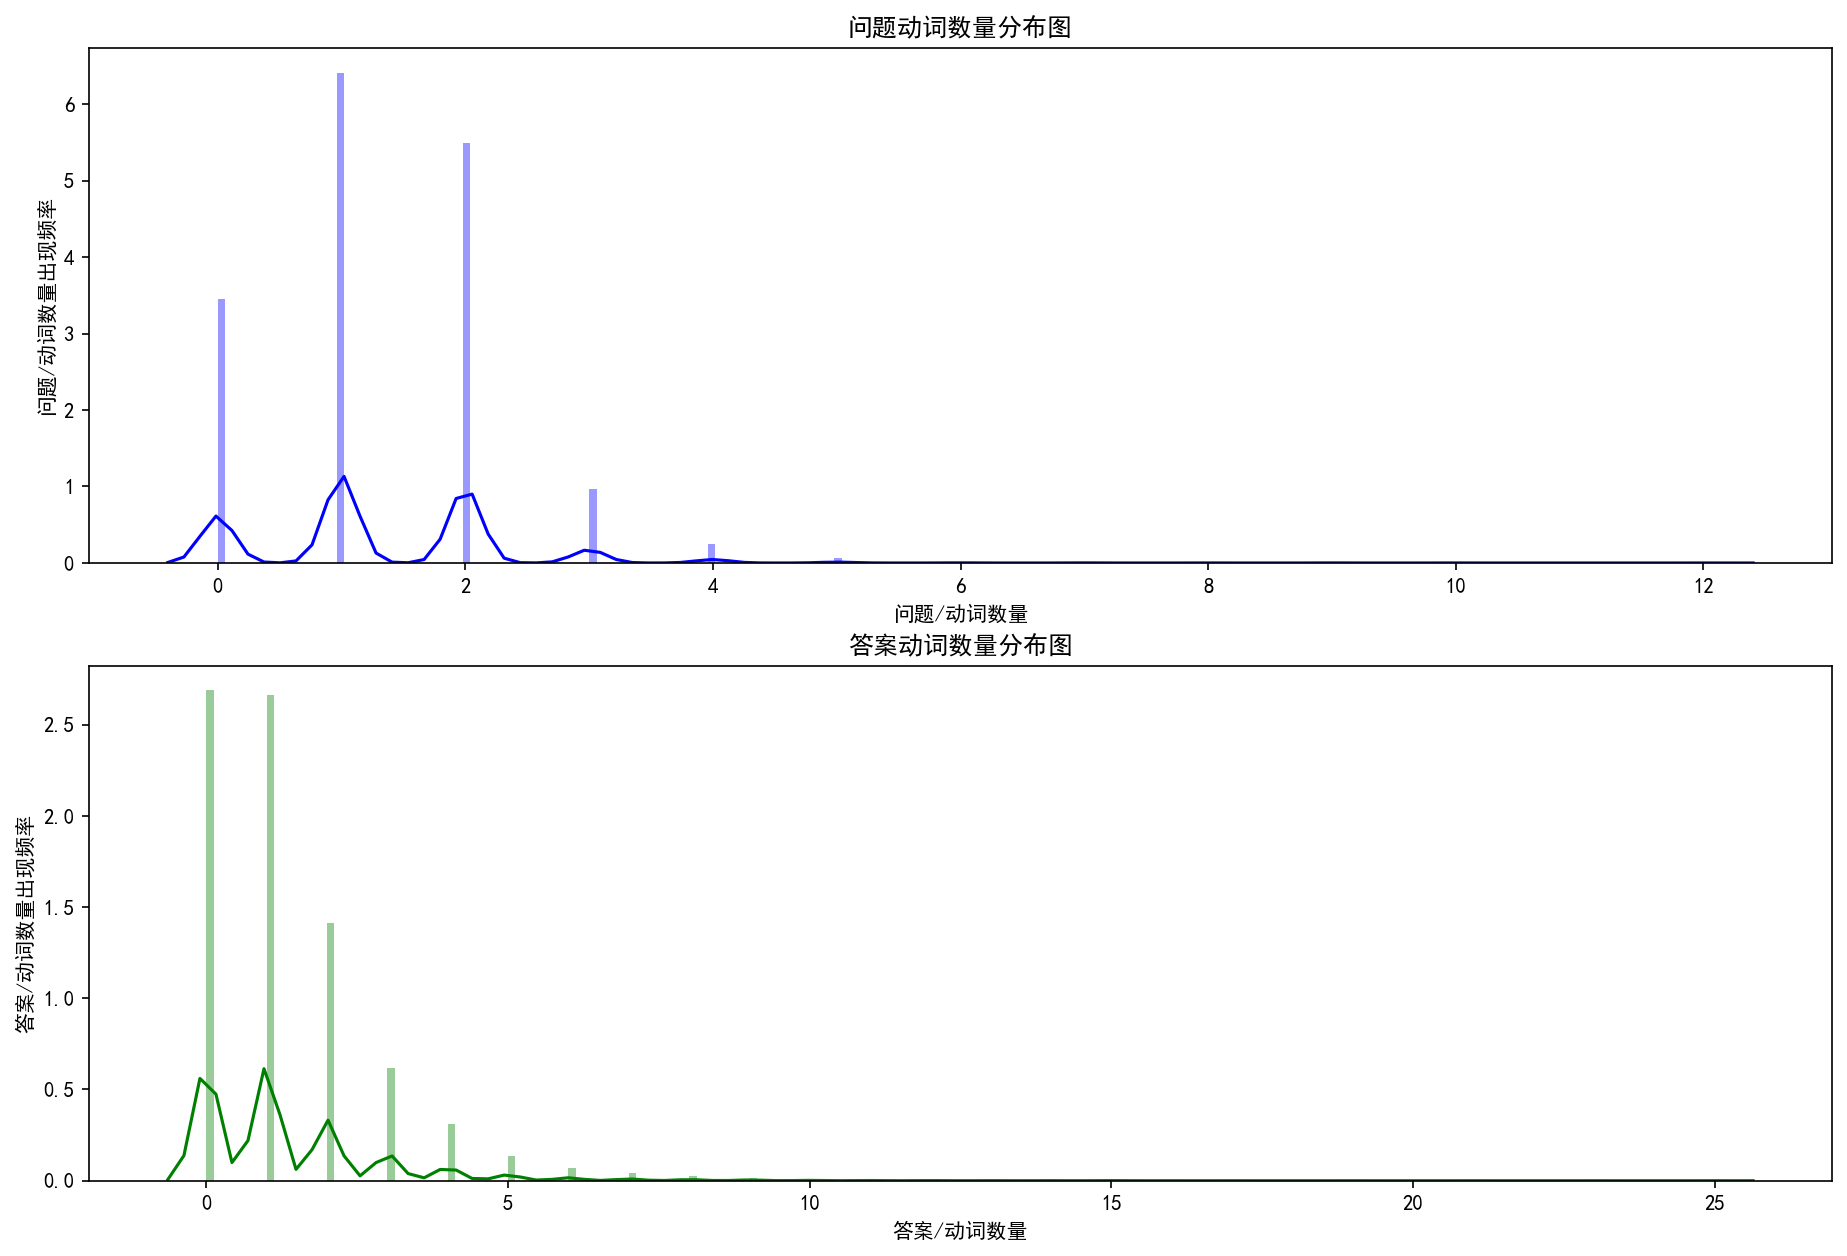

In [32]:
# 动词数量

plt.figure(figsize=(15,10), dpi=150)
plt.subplot(2,1,1)
sns.distplot(train_df.q_num_of_verb, bins=200, color='blue')
plt.xlabel("问题/动词数量")
plt.ylabel("问题/动词数量出现频率")
plt.title("问题动词数量分布图")
plt.subplot(2,1,2)
sns.distplot(train_df.a_num_of_verb, bins=200, color='green')
plt.xlabel("答案/动词数量")
plt.ylabel("答案/动词数量出现频率")
plt.title("答案动词数量分布图")
plt.show()

In [9]:
# 文本长度分布呈长尾分布，计算最佳截短长度，一般数据集比较大时取95%，较小时取99%
question_truncated_length = sorted(train_df.q_char_len.values)[int(train_df.shape[0] * 0.999)]
answer_truncated_length = sorted(train_df.a_char_len.values)[int(train_df.shape[0] * 0.999)]
qa_truncated_length = sorted(train_df.qa_len.values)[int(train_df.shape[0] * 0.999)]
print("问题最佳截断长度为：{}，答案最佳截断长度为：{}".format(question_truncated_length, answer_truncated_length))
print("问答放一块的最佳截断长度为：{}".format(qa_truncated_length))

问题最佳截断长度为：45，答案最佳截断长度为：106
问答放一块的最佳截断长度为：122


In [55]:
# 利用特征工程，简单地对模型进行判断
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# 合并造出一个新的数据帧
train_data = pd.DataFrame(train_df, columns=['q_char_len','a_char_len','q_word_len','a_word_len','q_char_unique', 'a_char_unique', 'q_punctuation_count',
                                             'a_punctuation_count', 'q_mean_word_length', 'a_mean_word_length', 'q_max_word_length', 'a_max_word_length',
                                             'q_category_of_punctuation', 'a_category_of_punctuation', 'q_num_of_noun', 'a_num_of_noun', 'q_num_of_verb',
                                             'a_num_of_verb'])
train_label = train_df["label"]
test_data = pd.DataFrame(test_df, columns=['q_char_len','a_char_len','q_word_len','a_word_len','q_char_unique', 'a_char_unique', 'q_punctuation_count',
                                             'a_punctuation_count', 'q_mean_word_length', 'a_mean_word_length', 'q_max_word_length', 'a_max_word_length',
                                             'q_category_of_punctuation', 'a_category_of_punctuation', 'q_num_of_noun', 'a_num_of_noun', 'q_num_of_verb',
                                             'a_num_of_verb'])
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.2)

print("Train data length:", len(X_train))
print("Test data length:", len(X_test))

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# 参数
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'regression',  # 目标函数
    'metric': {'auc'},  # 评估函数
    'num_leaves': 31,  # 叶子节点数
    'learning_rate': 0.05,  # 学习速率
    'feature_fraction': 0.9,  # 建树的特征选择比例
    'bagging_fraction': 0.8,  # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}

# 模型训练
gbm = lgb.train(params, lgb_train, num_boost_round=100, valid_sets=lgb_eval, early_stopping_rounds=5)

# 模型保存
gbm.save_model('model.txt')

Train data length: 17268
Test data length: 4317
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 17268, number of used features: 18
[LightGBM] [Info] Start training from score 0.249363
[1]	valid_0's auc: 0.631398
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.641057
[3]	valid_0's auc: 0.646089
[4]	valid_0's auc: 0.64921
[5]	valid_0's auc: 0.651635
[6]	valid_0's auc: 0.652215
[7]	valid_0's auc: 0.651556
[8]	valid_0's auc: 0.65171
[9]	valid_0's auc: 0.656566
[10]	valid_0's auc: 0.65889
[11]	valid_0's auc: 0.659631
[12]	valid_0's auc: 0.659333
[13]	valid_0's auc: 0.660014
[14]	valid_0's auc: 0.659855
[15]	valid_0's auc: 0.660024
[16]	valid_0's auc: 0.661345
[17]	valid_0's auc: 0.660828
[18]	valid_0's auc: 0.66171
[19]	valid_0's auc: 0.661933
[20]	valid

In [57]:
# 模型加载
gbm = lgb.Booster(model_file='model.txt')

# 模型预测
y_pred = gbm.predict(test_data, num_iteration=gbm.best_iteration)

# 这个特征明显太拉胯了，可能需要复杂的特征，比如：词向量、tfidf什么的
# 提交上去就8分，不能忍，浪费我的提交机会
y_pred = (y_pred >= 0.5).astype(int)
submit = pd.read_csv("sample_submission.tsv", header=None, sep="\t")
submit.columns = ["cid", "rid", "label"]
submit["label"] = y_pred
submit.to_csv("submit_lightgbm.tsv", header = None, sep="\t", index=None)

In [30]:
# 缺失值分析
train_df.isnull().sum()

cid              0
text_a           0
rid              0
text_b           1
label            0
q_char_len       0
a_char_len       0
q_word_len       0
a_word_len       0
q_char_unique    0
a_char_unique    0
q_word_unique    0
a_word_unique    0
q_keywords       0
dtype: int64

In [31]:
# 经检查答案里面有一例缺失值
train_df[train_df.text_b.isnull()]

,cid,text_a,rid,text_b,label,q_char_len,a_char_len,q_word_len,a_word_len,q_char_unique,a_char_unique,q_word_unique,a_word_unique,q_keywords
2194,604,您好，请问这个房子周边有哪些学校,3,NaN,0,16,3,9,1,16,2,9,1,请问 房子 有 学校


In [39]:
# 填补缺失值
train_df.text_b = train_df.text_b.fillna("好的")

In [32]:
# 统计重复的对话
train_df.value_counts(["text_a", "text_b"])

text_a          text_b                    
什么时候能够看房呢？      您好                            76
                你好                            61
这套房源价格还有优惠空间么？  您好                            46
这套房源价格还有优惠空间吗？  您好                            41
                你好                            24
                                              ..
现在几套能看          您好，您之前咨询的房源户型很优质，您有时间去看看吗？     1
                还有一套我需要问下                      1
现在到我线上看房吗       你好                             1
                是的                             1
   契税是几个点，赠与的话  2019年的房子                       1
Length: 20168, dtype: int64

In [4]:
stopwords1 = [
    '？','?','吗','的',',','，','我','呢','了','吧','么','你','啊','你好','您好','!','！','您','#',"那个","哪个",
    "是不是","是","不是",'/','、','(',')','（','）','哦','。'
]
# 在回复里面有可能字数较少，为了防止把整个句子过滤，较少一部分词的停用
stopwords2 = [
    '吗','的',',','，','我','呢','了','吧','么','你','啊','!','！','您','#',
    '/','、','(',')','（','）','哦','。'
]
train_df['clean_text_a'] = train_df['text_a']
train_df['clean_text_b'] = train_df['text_b']
for w in stopwords1:
    train_df['clean_text_a'] = train_df['clean_text_a'].apply(lambda x:str(x).replace(w, ""))
for w in stopwords2:
    train_df['clean_text_b'] = train_df['clean_text_b'].apply(lambda x:str(x).replace(w, ""))

In [5]:
train_df['qa'] = train_df['clean_text_a'] + train_df['clean_text_b']

In [44]:
train_df.head(5)

,cid,text_a,rid,text_b,label,q_char_len,a_char_len,q_word_len,a_word_len,q_char_unique,a_char_unique,q_word_unique,a_word_unique,q_keywords,clean_text_a,clean_text_b,qa
0,0,采荷一小是分校吧,0,杭州市采荷第一小学钱江苑校区，杭州市钱江新城实验学校。,1,8,27,5,12,8,20,5,11,采荷 是 分校,采荷一小分校,杭州市采荷第一小学钱江苑校区杭州市钱江新城实验学校,采荷一小分校杭州市采荷第一小学钱江苑校区杭州市钱江新城实验学校
1,0,采荷一小是分校吧,1,是的,0,8,2,5,2,8,2,5,2,采荷 是 分校,采荷一小分校,是,采荷一小分校是
2,0,采荷一小是分校吧,2,这是5楼,0,8,4,5,3,8,4,5,3,采荷 是 分校,采荷一小分校,这是5楼,采荷一小分校这是5楼
3,1,毛坯吗？,0,因为公积金贷款贷的少,0,4,10,3,6,4,9,3,6,毛坯,毛坯,因为公积金贷款贷少,毛坯因为公积金贷款贷少
4,1,毛坯吗？,1,是呢,0,4,2,3,2,4,2,3,2,毛坯,毛坯,是,毛坯是


In [6]:
count = train_df['qa'].value_counts()
# 提取重复的对话，经过停用词过滤来让一些语气词不同的句子也归为一类，来检测不一致标签
qa = {q:c for q, c in count.items() if c > 1}

In [7]:
# 保存下来
with open("unmatched_label.txt", 'w', encoding="utf-8")as fin:
    for sen in qa:
        tmp = (train_df[train_df.qa == sen])
        if tmp.label.sum() > 0 and tmp.label.sum() < tmp.shape[0]:
            for i, row in tmp.iterrows():
                fin.write(str(i)+"\t"+str(row.text_a)+"\t"+str(row.text_b)+"\t"+str(row.label)+"\n")

In [11]:
with open("duplicated_negative.txt", 'w', encoding="utf-8")as fin:
    for sen in qa:
        tmp = (train_df[train_df.qa == sen])
        if tmp.label.sum() == 0:
            for i, row in tmp.iterrows():
                fin.write(str(i)+"\t"+str(row.text_a)+"\t"+str(row.text_b)+"\t"+str(row.label)+"\n")

In [46]:
duplicated = pd.read_csv("duplicated.txt", header = None, sep = '\t')
duplicated.head(5)

,0,1,2,3
0,1782,可以看房吗,可以的,1
1,1961,可以看房吗,可以的,0
2,3022,可以看房吗,可以的,1
3,3161,可以看房吗,可以的,1
4,3630,可以看房吗？,可以的,1


In [30]:
# 有140行标注不一致的标签，对它重新标注一下
indices = []
with open('duplicated.txt', encoding='utf-8') as fin:
    for lines in fin.readlines():
        indices.append(lines.strip().split('\t')[0])

In [35]:
# 为了便于分析，删掉某些用不上的信息
del train_df['qa']
del train_df['clean_text_a']
del train_df['clean_text_b']
del train_df['rid']

In [54]:
# 统计一些关键词的分布
keywords = train_df.q_keywords.value_counts()

In [58]:
# 截取前20的谈论话题看看
topics = keywords[1:21]

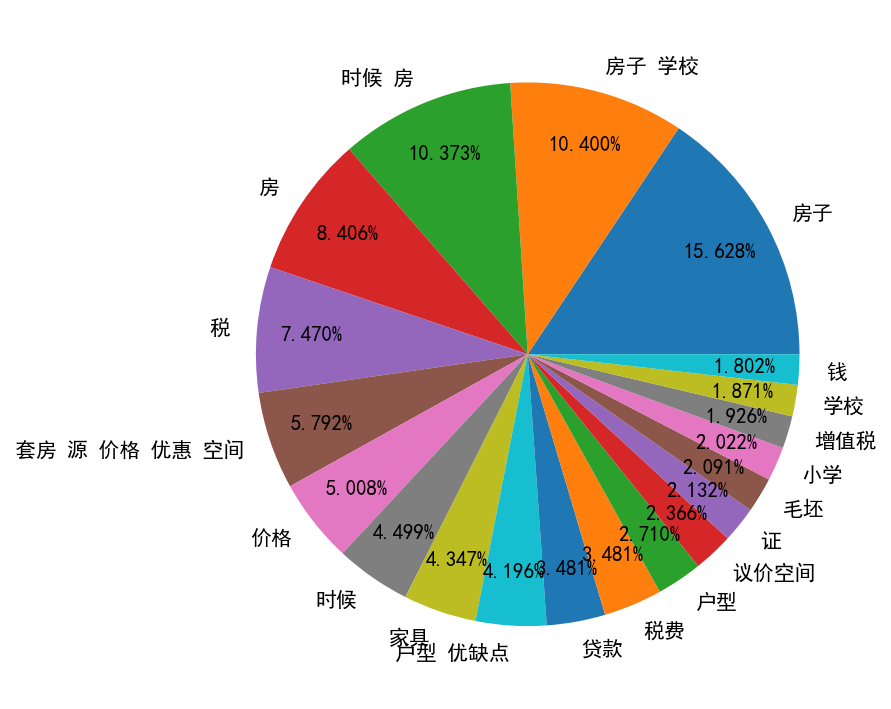

In [63]:
# 直接用词性来做文本关键词不太靠谱，但是还是能大致看出来，主要在讨论的一些问题
plt.figure(figsize=(6,6), dpi=150)
plt.pie(x = topics.values, labels = topics.index, autopct='%.3f%%', pctdistance=0.8)
plt.show()

In [ ]:
# 做一下数据清洗
# 1.文本纠错
# 2.去除停用词
# 3.文本标准化 如：10w -> N万/10万
# ...

In [ ]:
# 特征工程，传统的方式有：词袋模型(WordCount, N-grams, TF-IDF)
# 文本匹配有BM25模型
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

CountVec = CountVectorizer(
    analyzer="word",
    ngram_range=(1,2),
    max_df=0.9,
    min_df=3,
    max_features=3000
)

# 获取维度为3000维的稀疏向量
# ...并不想试，还不如word2vec来的实在